In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
from  sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()

In [2]:
df = pd.read_csv("OronSuuts.csv")

In [3]:
df.shape

(1471, 14)

In [4]:
df.head(10)

,Шал,Тагт,Ашиглалтанд орсон он,Гараж,Цонх,Барилгын давхар,Хаалга,Талбай,Хэдэн давхарт,Лизинг,Дүүрэг,Цонхны тоо,Байршил,Үнэ
0,Паркет,1тагттай,2020,Байхгүй,Вакум,16,Төмөр,139.2м²,15,Лизинггүй,Баянзүрх,5,Бусад,"3,3сая"
1,Паркет,1тагттай,2020,Байхгүй,Вакум,16,Бүргэд,54.0м²,4,Лизинггүй,Хан-Уул,2,Яармаг,"2,8сая"
2,Паркет,1тагттай,2020,Байгаа,Вакум,18,Бүргэд,120.0м²,11,Лизинггүй,Хан-Уул,4,Бусад,620сая
3,Паркет,Тагтгүй,2020,Байгаа,Вакум,15,Бүргэд,62.8м²,3,Лизинггүй,Баянзүрх,4,Офицер,2сая
4,Паркет,2тагттай,2021,Байгаа,Вакум,12,Бүргэд,108.0м²,1,Лизинггүй,Хан-Уул,6,RiverGarden,"3,5сая"
5,Паркет,1тагттай,2021,Байхгүй,Вакум,17,Бүргэд,72.53м²,12,Лизинггүй,Хан-Уул,5,Яармаг,"3,2сая"
6,Паркет,2тагттай,2021,Байхгүй,Вакум,16,Бүргэд,48.73м²,10,Лизинггүй,Хан-Уул,4,Бусад,"2,75сая"
7,Паркет,1тагттай,2021,Байхгүй,Вакум,7,Бүргэд,50.56м²,2,Лизинггүй,Хан-Уул,3,Яармаг,"1,7сая"
8,Паркет,1тагттай,2021,Байхгүй,Вакум,17,Бүргэд,83.13м²,14,Лизинггүй,Хан-Уул,4,Яармаг,"3,1сая"
9,Паркет,1тагттай,1989,Байхгүй,Мод,9,Бүргэд,29.0м²,5,Лизинггүй,Сүхбаатар,3,220мянгат,130сая


In [5]:
df.describe()

,Ашиглалтанд орсон он,Барилгын давхар,Хэдэн давхарт,Цонхны тоо
count,1471.000000,1471.000000,1471.000000,1471.000000
mean,2013.671652,11.532291,6.487424,3.373215
std,9.598200,4.424131,4.099404,1.476368
min,1980.000000,1.000000,1.000000,1.000000
25%,2012.000000,9.000000,3.000000,2.000000
50%,2017.000000,12.000000,6.000000,3.000000
75%,2020.000000,16.000000,9.000000,4.000000
max,2021.000000,25.000000,24.000000,8.000000


In [6]:
def removegraj(tagt):
    tagt = tagt.replace('Байхгүй','0')
    tagt = tagt.replace('Байгаа','1')
    return int(tagt)
df['Гараж'].value_counts()

Байхгүй    1130
Байгаа      341
Name: Гараж, dtype: int64

In [7]:

def removetagt(tagt):
    tagt = tagt.replace('тагттай','')
    tagt = tagt.replace('Тагтгүй','0')
    tagt = tagt.replace('+','')
    return int(tagt)
def removesay(une):
    une = une.replace('сая','')
    une = une.replace(',','.')
    return float(une)
def removem2(une):
    une = une.replace('м²','')
    return float(une)

def niitune(a):
    print(a.shape)
    for i in range(1471):
        if a[i] < 20:
            a[i] = a[i]*df['Талбай'][i]
        a[i] = a[i]*1000000
    return a
        

In [8]:
df['Үнэ'] = df['Үнэ'].apply(removesay)
df['Талбай'] = df['Талбай'].apply(removem2)
df['Тагт'] = df['Тагт'].apply(removetagt)
df['Гараж'] = df['Гараж'].apply(removegraj)

In [9]:
df['Үнэ'] = df.loc[:,['Үнэ']].apply(niitune)

(1471,)


In [10]:
df['m2une'] = df['Үнэ']/df['Талбай']

In [11]:
df.head(1474)

,Шал,Тагт,Ашиглалтанд орсон он,Гараж,Цонх,Барилгын давхар,Хаалга,Талбай,Хэдэн давхарт,Лизинг,Дүүрэг,Цонхны тоо,Байршил,Үнэ,m2une
0,Паркет,1,2020,0,Вакум,16,Төмөр,139.20,15,Лизинггүй,Баянзүрх,5,Бусад,459360000.0,3.300000e+06
1,Паркет,1,2020,0,Вакум,16,Бүргэд,54.00,4,Лизинггүй,Хан-Уул,2,Яармаг,151200000.0,2.800000e+06
2,Паркет,1,2020,1,Вакум,18,Бүргэд,120.00,11,Лизинггүй,Хан-Уул,4,Бусад,620000000.0,5.166667e+06
3,Паркет,0,2020,1,Вакум,15,Бүргэд,62.80,3,Лизинггүй,Баянзүрх,4,Офицер,125600000.0,2.000000e+06
4,Паркет,2,2021,1,Вакум,12,Бүргэд,108.00,1,Лизинггүй,Хан-Уул,6,RiverGarden,378000000.0,3.500000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,Паркет,1,2021,0,Вакум,16,Бүргэд,79.60,5,Лизинггүй,Хан-Уул,3,Яармаг,135320000.0,1.700000e+06
1467,Паркет,1,2013,1,Вакум,12,Бүргэд,130.00,2,Лизинггүй,Хан-Уул,5,Хурд,247000000.0,1.900000e+06
1468,Паркет,2,2008,1,Вакум,10,Төмөр,137.51,6,Лизинггүй,Сүхбаатар,8,Багатойрог,288771000.0,2.100000e+06
1469,Паркет,3,2013,1,Вакум,10,Бүргэд,150.00,7,Лизинггүй,Хан-Уул,8,UBTown,240000000.0,1.600000e+06


In [12]:
df.describe()

,Тагт,Ашиглалтанд орсон он,Гараж,Барилгын давхар,Талбай,Хэдэн давхарт,Цонхны тоо,Үнэ,m2une
count,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1.471000e+03,1.471000e+03
mean,1.107410,2013.671652,0.231815,11.532291,72.107573,6.487424,3.373215,1.812980e+08,2.309153e+06
std,0.537713,9.598200,0.422135,4.424131,41.743222,4.099404,1.476368,1.872885e+08,1.011164e+06
min,0.000000,1980.000000,0.000000,1.000000,18.000000,1.000000,1.000000,3.500000e+07,7.466667e+05
25%,1.000000,2012.000000,0.000000,9.000000,46.310000,3.000000,2.000000,8.500000e+07,1.700000e+06
50%,1.000000,2017.000000,0.000000,12.000000,59.900000,6.000000,3.000000,1.214400e+08,2.000000e+06
75%,1.000000,2020.000000,0.000000,16.000000,83.165000,9.000000,4.000000,2.001250e+08,2.600000e+06
max,3.000000,2021.000000,1.000000,25.000000,462.000000,24.000000,8.000000,2.000000e+09,1.800000e+07


In [13]:
loc_stat = df.groupby('Байршил')['Байршил'].agg('count').sort_values(ascending=False)
loc_stat

Байршил
Бусад             283
Яармаг            154
3,4хороолол        96
Зайсан             78
13-рхороолол       65
                 ... 
BellaVista          2
Тээврийнтовчоо      2
Баянхошуу           2
Чингэлтэй           1
Эрдэнэтолгой        1
Name: Байршил, Length: 67, dtype: int64

In [14]:
df['Байршил'].unique()


array(['Бусад', 'Яармаг', 'Офицер', 'RiverGarden', '220мянгат',
       'Дөлгөөннуур', '16-рхороолол', 'Нисэх', '21-рхороолол', 'Зайсан',
       'Баруун4зам', 'Хүннү', '5-рхороолол', '13-рхороолол',
       'ИхМонголхороолол', 'Алтайхотхон', 'Багатойрог', '15-рхороолол',
       '1-рхороолол', 'Дэнжийн1000', 'KingTower', 'Баянбүрд',
       'Olympicvillage', 'Баянмонголхороолол', '120мянгат',
       '10-рхороолол', 'UBTown', 'Хансвиллхотхон', '3,4хороолол',
       '14-рхороолол', '40,50мянгат', '19-рхороолол', 'Толгойт',
       'Амгалан', 'Ханынматериал', '100айл', 'Москвахороолол', 'Төмөрзам',
       'Сансар', 'RomanaResidence', 'Өгөөмөрзахынзүүн', 'Japantown',
       '11-рхороолол', 'Богд-Ар', 'Хос-Өргөө', 'BellaVista',
       'Олимпхотхон', 'Нарханхотхон', 'Marshalltown', 'Нарныхороолол',
       'Зүүн4зам', 'Шархад', '25-рэмийнсан', 'Sunrise', '5шар',
       '6-рбичил', 'Чулууновоо', 'Орбит', 'Vivacity', 'Хурд', 'Сонсголон',
       'Riverstone', 'Гандан', 'Баянхошуу', 'Чингэлтэй', 'Тээв

In [15]:
df['Байршил'].value_counts()

Бусад             283
Яармаг            154
3,4хороолол        96
Зайсан             78
13-рхороолол       65
                 ... 
Olympicvillage      2
BellaVista          2
Riverstone          2
Эрдэнэтолгой        1
Чингэлтэй           1
Name: Байршил, Length: 67, dtype: int64

In [16]:
def removeout(df):
    df_out =pd.DataFrame()
    for key, subdf in df.groupby('Дүүрэг'):
        m = np.mean(subdf.m2une)
        st = np.std(subdf.m2une)
        reduced_df = subdf[(subdf.m2une>(m-st)) & (subdf.m2une<=(m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [17]:
df1 = df.copy()


In [18]:
df1.shape

(1471, 15)

In [19]:
def plot_scatter(df,location):
    bh

In [20]:
dm_duureg = pd.get_dummies(df1['Дүүрэг'])

In [21]:
df1 = df1.join(dm_duureg)


In [22]:
df1.drop(['Цонх'], axis=1, inplace = True)
df1.drop(['Хаалга'], axis=1, inplace = True)
df1.drop(['Лизинг'], axis=1, inplace = True)
df1.drop(['Дүүрэг'], axis=1, inplace = True)
df1.drop(['Шал'], axis=1, inplace = True)
df1.drop(['Байршил'], axis=1, inplace = True)

In [23]:
df1

,Тагт,Ашиглалтанд орсон он,Гараж,Барилгын давхар,Талбай,Хэдэн давхарт,Цонхны тоо,Үнэ,m2une,Багахангай,Баянгол,Баянзүрх,Налайх,Ороннутаг,СонгиноХайрхан,Сүхбаатар,Хан-Уул,Чингэлтэй
0,1,2020,0,16,139.20,15,5,459360000.0,3.300000e+06,0,0,1,0,0,0,0,0,0
1,1,2020,0,16,54.00,4,2,151200000.0,2.800000e+06,0,0,0,0,0,0,0,1,0
2,1,2020,1,18,120.00,11,4,620000000.0,5.166667e+06,0,0,0,0,0,0,0,1,0
3,0,2020,1,15,62.80,3,4,125600000.0,2.000000e+06,0,0,1,0,0,0,0,0,0
4,2,2021,1,12,108.00,1,6,378000000.0,3.500000e+06,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,1,2021,0,16,79.60,5,3,135320000.0,1.700000e+06,0,0,0,0,0,0,0,1,0
1467,1,2013,1,12,130.00,2,5,247000000.0,1.900000e+06,0,0,0,0,0,0,0,1,0
1468,2,2008,1,10,137.51,6,8,288771000.0,2.100000e+06,0,0,0,0,0,0,1,0,0
1469,3,2013,1,10,150.00,7,8,240000000.0,1.600000e+06,0,0,0,0,0,0,0,1,0


In [24]:
df1.describe()

,Тагт,Ашиглалтанд орсон он,Гараж,Барилгын давхар,Талбай,Хэдэн давхарт,Цонхны тоо,Үнэ,m2une,Багахангай,Баянгол,Баянзүрх,Налайх,Ороннутаг,СонгиноХайрхан,Сүхбаатар,Хан-Уул,Чингэлтэй
count,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1.471000e+03,1.471000e+03,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000
mean,1.107410,2013.671652,0.231815,11.532291,72.107573,6.487424,3.373215,1.812980e+08,2.309153e+06,0.000680,0.159755,0.260367,0.002039,0.000680,0.076818,0.080897,0.386812,0.031951
std,0.537713,9.598200,0.422135,4.424131,41.743222,4.099404,1.476368,1.872885e+08,1.011164e+06,0.026073,0.366504,0.438984,0.045129,0.026073,0.266394,0.272770,0.487186,0.175930
min,0.000000,1980.000000,0.000000,1.000000,18.000000,1.000000,1.000000,3.500000e+07,7.466667e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2012.000000,0.000000,9.000000,46.310000,3.000000,2.000000,8.500000e+07,1.700000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2017.000000,0.000000,12.000000,59.900000,6.000000,3.000000,1.214400e+08,2.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2020.000000,0.000000,16.000000,83.165000,9.000000,4.000000,2.001250e+08,2.600000e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,2021.000000,1.000000,25.000000,462.000000,24.000000,8.000000,2.000000e+09,1.800000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
cols = list(df1.columns)  
cols

['Тагт',
 'Ашиглалтанд орсон он',
 'Гараж',
 'Барилгын давхар',
 'Талбай',
 'Хэдэн давхарт',
 'Цонхны тоо',
 'Үнэ',
 'm2une',
 'Багахангай',
 'Баянгол',
 'Баянзүрх',
 'Налайх',
 'Ороннутаг',
 'СонгиноХайрхан',
 'Сүхбаатар',
 'Хан-Уул',
 'Чингэлтэй']

In [26]:
cols = cols[:9]
cols

['Тагт',
 'Ашиглалтанд орсон он',
 'Гараж',
 'Барилгын давхар',
 'Талбай',
 'Хэдэн давхарт',
 'Цонхны тоо',
 'Үнэ',
 'm2une']

In [27]:
#sns.pairplot(df1[cols],size = 2.0)

Text(0.5, 1.0, 'Өгөгдлийн хоорондын холбоо хамаарал')

<Figure size 1440x720 with 0 Axes>

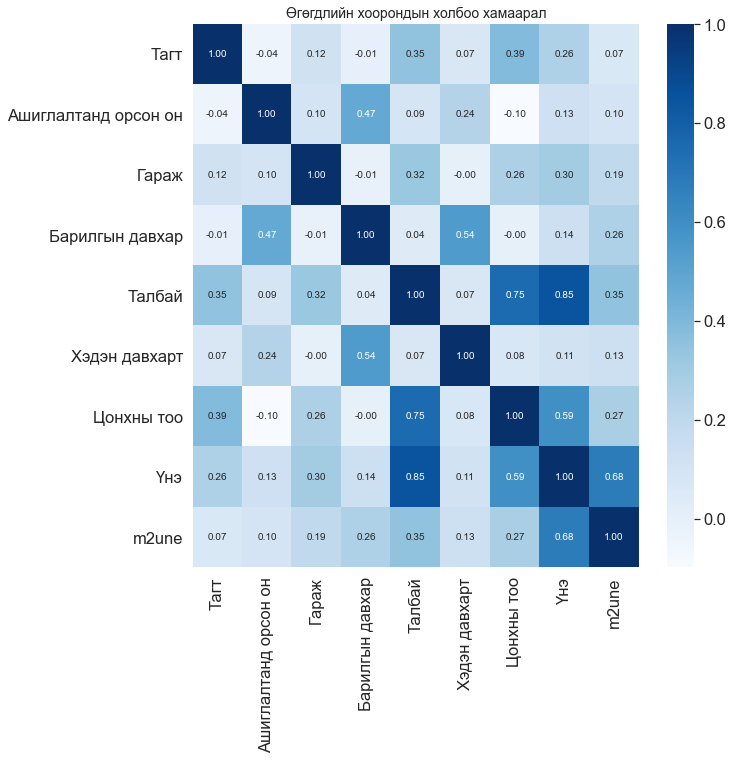

In [28]:


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(df[cols].iloc[:, range(0,9)].values)

cov_mat = np.cov(X_sc.T)
plt.tight_layout()
plt.figure(figsize = (10,10))
sns.set(font_scale = 1.5)
heatmap = sns.heatmap(cov_mat,
                     annot = True,
                     fmt = '.2f',
                     annot_kws = {'size' : 10},
                     cmap = 'Blues',
                     yticklabels = cols,
                     xticklabels = cols)
plt.title('Өгөгдлийн хоорондын холбоо хамаарал', family = 'Arial', fontsize = 14)

In [29]:
model_df = df1.copy()
model_df

,Тагт,Ашиглалтанд орсон он,Гараж,Барилгын давхар,Талбай,Хэдэн давхарт,Цонхны тоо,Үнэ,m2une,Багахангай,Баянгол,Баянзүрх,Налайх,Ороннутаг,СонгиноХайрхан,Сүхбаатар,Хан-Уул,Чингэлтэй
0,1,2020,0,16,139.20,15,5,459360000.0,3.300000e+06,0,0,1,0,0,0,0,0,0
1,1,2020,0,16,54.00,4,2,151200000.0,2.800000e+06,0,0,0,0,0,0,0,1,0
2,1,2020,1,18,120.00,11,4,620000000.0,5.166667e+06,0,0,0,0,0,0,0,1,0
3,0,2020,1,15,62.80,3,4,125600000.0,2.000000e+06,0,0,1,0,0,0,0,0,0
4,2,2021,1,12,108.00,1,6,378000000.0,3.500000e+06,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,1,2021,0,16,79.60,5,3,135320000.0,1.700000e+06,0,0,0,0,0,0,0,1,0
1467,1,2013,1,12,130.00,2,5,247000000.0,1.900000e+06,0,0,0,0,0,0,0,1,0
1468,2,2008,1,10,137.51,6,8,288771000.0,2.100000e+06,0,0,0,0,0,0,1,0,0
1469,3,2013,1,10,150.00,7,8,240000000.0,1.600000e+06,0,0,0,0,0,0,0,1,0


In [30]:
X = model_df.drop(['Үнэ','m2une'],axis='columns')
y = model_df.Үнэ
y.head()

0    459360000.0
1    151200000.0
2    620000000.0
3    125600000.0
4    378000000.0
Name: Үнэ, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)
from sklearn.linear_model import LinearRegression

In [32]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

0.7689293835427333

In [33]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

cv = ShuffleSplit(n_splits=10, test_size =0.2, random_state=0)

cross_val_score(LinearRegression(normalize = True), X,y,cv=cv)

array([0.82296243, 0.72019951, 0.68532196, 0.75667731, 0.73097476,
       0.79723956, 0.79587575, 0.68496437, 0.74324298, 0.75808633])

In [34]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/home/nest/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8898001006324383e+18, tolerance: 3622066675511926.0
  model = cd_fast.enet_coordinate_descent(
/home/nest/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.897588646897757e+18, tolerance: 3740472863365510.0
  model = cd_fast.enet_coordinate_descent(
/home/nest/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3728716476128256e+16, tolerance: 3622066675511926.0
  model = cd_fast.enet_coordinate_descent(
/home/nest/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coo

,model,best_score,best_params
0,linear_regression,0.743260,{'normalize': False}
1,lasso,0.743409,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.761838,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [35]:
X.columns

Index(['Тагт', 'Ашиглалтанд орсон он', 'Гараж', 'Барилгын давхар', 'Талбай',
       'Хэдэн давхарт', 'Цонхны тоо', 'Багахангай', 'Баянгол', 'Баянзүрх',
       'Налайх', 'Ороннутаг', 'СонгиноХайрхан', 'Сүхбаатар', 'Хан-Уул',
       'Чингэлтэй'],
      dtype='object')

In [36]:
def predict_price(tagt,on,garaj,davhar,talbai,davhart,tsonh,duureg):    
    loc_index = np.where(X.columns==duureg)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = tagt
    x[1] = on
    x[2] = garaj
    x[3] = davhar
    x[4] = talbai
    x[5] = davhart
    x[6] = tsonh
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [37]:
lr_clf.fit(X,y)

LinearRegression()

In [38]:
predict_price(0,2016,0,16,51.0,9,2,'Баянзүрх')

116137129.65035479

In [43]:
predict_price(1,2021,0,12,46.0,2,3,'Хан-Уул')

80465280.07969823

In [44]:
import pickle
with open('Ulaanbatar_Oronsuuts_une_taamaglah_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [45]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))